<a href="https://colab.research.google.com/github/virgantara/simple-linear-regression/blob/master/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


Load data dari dataset akpam

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/virgantara/sample_dataset/master/akpam.csv")
# dataset = pd.read_csv("/content/akpam.csv")
dataset.shape

(8, 2)

Plot atau view data ke dalam grafik untuk visualisasi. Dikarenakan pola data cenderung linier, kita bisa modelkan ke dalam model persamaan linier, yaitu:
\begin{align}
y = b + ax \\
\end{align}

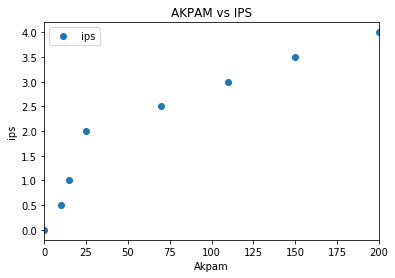

In [3]:
dataset.plot(x='Akpam', y='ips', style='o')
plt.title('AKPAM vs IPS')
plt.xlabel('Akpam')
plt.ylabel('ips')
plt.show()


Memetakan dataset ke variabel X dan Y

In [0]:
X = dataset['ips'].values.reshape(-1,1)
y = dataset['Akpam'].values.reshape(-1,1)

Memilah/split dataset menjadi 80 % untuk data training dan sisanya untuk data testing. 
test_size=0.2 artinya menentukan ukuran data test sebesar 0.2 atau 20 % dari dataset asli 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Karena pola data cenderung linier, maka dipakai metode Regresi Linier. Di sini, dipakai class dari library sklearn yaitu LinearRegression

In [0]:
regressor = LinearRegression()


Berikutnya adalah training atau melatih data dari variabel X_train dan y_train. Tujuan dari training adalah mencari nilai koefisien sehingga akan didapatkan model persamaan liniernya.

In [7]:
regressor.fit(X_train, y_train) #training the algorithm
print(regressor.intercept_)
print(regressor.coef_)

[-48.40540541]
[[55.18918919]]


regressor.coef_ adalah koefisien model yang didapat. Secara matematis, kita sudah dapat model formula dari persamaan linier antara ips dengan akpam, misalnya:
\begin{align}
y = 48.62x - 16.41 \\
\end{align}

dari model, kita melakukan uji coba testing dengan data 20% sisanya. 

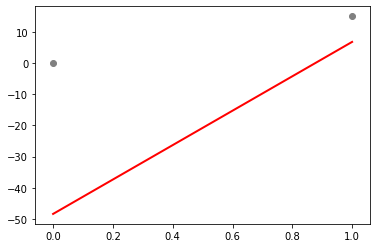

In [8]:
y_pred = regressor.predict(X_test)
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

Dalam uji coba model, perlu diukur tingkat akurasinya. Salah satu caranya menggunakan metode Root Mean Squared Error (RMSE). Adapun formula dari MSE adalah sebagai berikut:
\begin{align}
RMSE = \sqrt{\frac{\sum_{i=1}^n (y_i - y_i')^2}{n}}
\end{align}
di mana $y_i$ adalah hasil output model, $y_i'$ adalah data output yang divalidasi, dan $n$ adalah jumlah data

In [9]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 34.7173550358698


$RMSE \approx 0$, maka semakin akurat model yang dibuat